In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
!ls


archive.zip  sample_data


In [ ]:
!unzip archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_124.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_125.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_126.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_127.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_128.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_129.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_130.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_131.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_132.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_133.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_134.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_135.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_136.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_137.jpg  
  inflating: input/Non Demented/OAS1_0006_MR1_mpr-1_138.jpg  
  inflating: input/

In [ ]:
!ls


archive.zip  input  sample_data


In [ ]:
!ls input


'Mild Dementia'  'Moderate Dementia'  'Non Demented'  'Very mild Dementia'


In [ ]:
!pip install numpy opencv-python scikit-image scikit-learn matplotlib minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=dafc61481ffa37f5aec0ab938c32d94327a9155f20c30ad2b47fa29a3f5adb34
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from minisom import MiniSom
from sklearn.cluster import KMeans
from skimage.feature import graycomatrix, graycoprops

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
DATASET_PATH = "/content/input"

LABELS = {
    "Non Demented": 0,
    "Very mild Dementia": 1,
    "Mild Dementia": 2,
    "Moderate Dementia": 3
}


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (256, 256))
    img = cv2.medianBlur(img, 5)

    # Simple skull stripping
    _, thresh = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    brain = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    return brain


In [ ]:
def amsom_kmeans_segmentation(image):
    pixels = image.reshape(-1, 1)

    som = MiniSom(
        x=8, y=8,
        input_len=1,
        sigma=1.0,
        learning_rate=0.5
    )
    som.random_weights_init(pixels)
    som.train_random(pixels, 100)

    som_weights = som.get_weights().reshape(-1, 1)

    kmeans = KMeans(
        n_clusters=3,
        init=som_weights[:3],
        n_init=1,
        random_state=42
    )

    labels = kmeans.fit_predict(pixels)
    segmented = labels.reshape(256, 256)

    return segmented



In [ ]:
def extract_glcm_features(image):
    image = image.astype(np.uint8)

    glcm = graycomatrix(
        image,
        distances=[1],
        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
        levels=256,
        symmetric=True,
        normed=True
    )

    features = [
        graycoprops(glcm, 'contrast').mean(),
        graycoprops(glcm, 'energy').mean(),
        graycoprops(glcm, 'homogeneity').mean(),
        graycoprops(glcm, 'correlation').mean()
    ]
    return features


In [ ]:
features = []
labels = []

for class_name, label in LABELS.items():
    folder_path = os.path.join(DATASET_PATH, class_name)

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)

        img = preprocess_image(img_path)
        seg = amsom_kmeans_segmentation(img)
        feat = extract_glcm_features(seg)

        features.append(feat)
        labels.append(label)

X = np.array(features)
y = np.array(labels)

print("Total samples:", X.shape[0])
print("Feature vector size:", X.shape[1])


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/

Total samples: 9488
Feature vector size: 4


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Reduced feature size:", X_pca.shape[1])


Reduced feature size: 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}



========== KNN ==========
Accuracy: 0.5642781875658588
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       604
           1       0.54      0.57      0.56       595
           2       0.58      0.54      0.56       597
           3       0.25      0.04      0.07       102

    accuracy                           0.56      1898
   macro avg       0.49      0.46      0.45      1898
weighted avg       0.55      0.56      0.55      1898



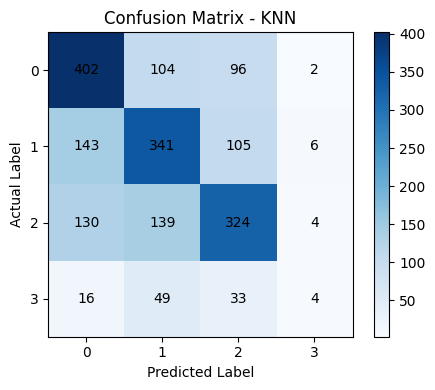


========== SVM ==========
Accuracy: 0.5521601685985248
              precision    recall  f1-score   support

           0       0.56      0.68      0.61       604
           1       0.54      0.46      0.50       595
           2       0.56      0.60      0.58       597
           3       0.00      0.00      0.00       102

    accuracy                           0.55      1898
   macro avg       0.41      0.44      0.42      1898
weighted avg       0.52      0.55      0.53      1898



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


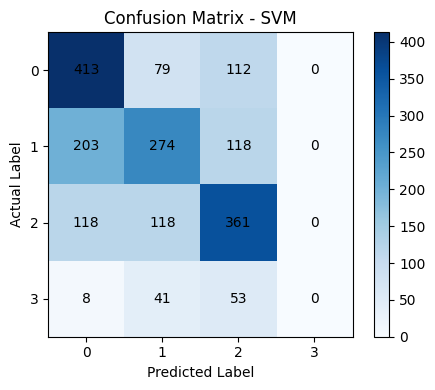


========== Decision Tree ==========
Accuracy: 0.4952581664910432
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       604
           1       0.48      0.48      0.48       595
           2       0.50      0.50      0.50       597
           3       0.14      0.11      0.12       102

    accuracy                           0.50      1898
   macro avg       0.42      0.41      0.42      1898
weighted avg       0.49      0.50      0.49      1898



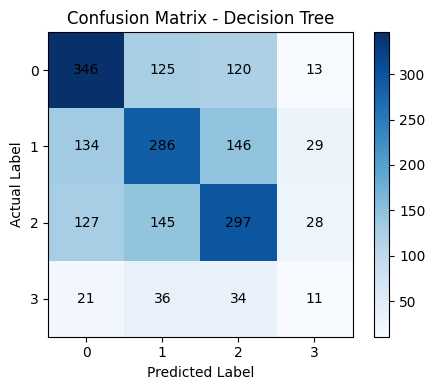


========== Random Forest ==========
Accuracy: 0.5437302423603794
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       604
           1       0.55      0.55      0.55       595
           2       0.53      0.56      0.55       597
           3       0.16      0.09      0.11       102

    accuracy                           0.54      1898
   macro avg       0.46      0.45      0.45      1898
weighted avg       0.53      0.54      0.54      1898



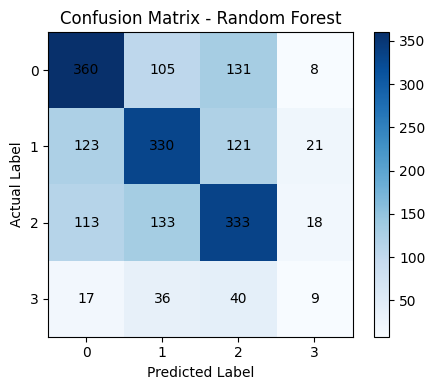


========== Naive Bayes ==========
Accuracy: 0.5015806111696522
              precision    recall  f1-score   support

           0       0.50      0.64      0.56       604
           1       0.51      0.31      0.38       595
           2       0.50      0.64      0.56       597
           3       0.00      0.00      0.00       102

    accuracy                           0.50      1898
   macro avg       0.38      0.40      0.38      1898
weighted avg       0.48      0.50      0.48      1898



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


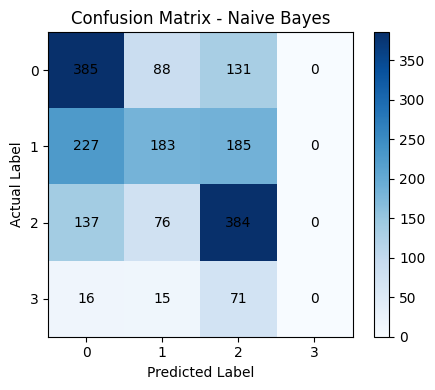

In [ ]:
results = {}

for name, model in classifiers.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n========== {name} ==========")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()

    # Numeric labels only: 0,1,2,3
    ticks = [0, 1, 2, 3]
    plt.xticks(ticks, ticks)
    plt.yticks(ticks, ticks)

    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")

    # Add values inside cells
    for i in range(len(ticks)):
        for j in range(len(ticks)):
            plt.text(j, i, cm[i, j],
                     ha="center", va="center", color="black")

    plt.tight_layout()
    plt.show()


In [ ]:
print("\n===== FINAL CLASSIFIER COMPARISON =====")
for clf, acc in results.items():
    print(f"{clf}: {acc:.4f}")



===== FINAL CLASSIFIER COMPARISON =====
KNN: 0.5643
SVM: 0.5522
Decision Tree: 0.4953
Random Forest: 0.5437
Naive Bayes: 0.5016


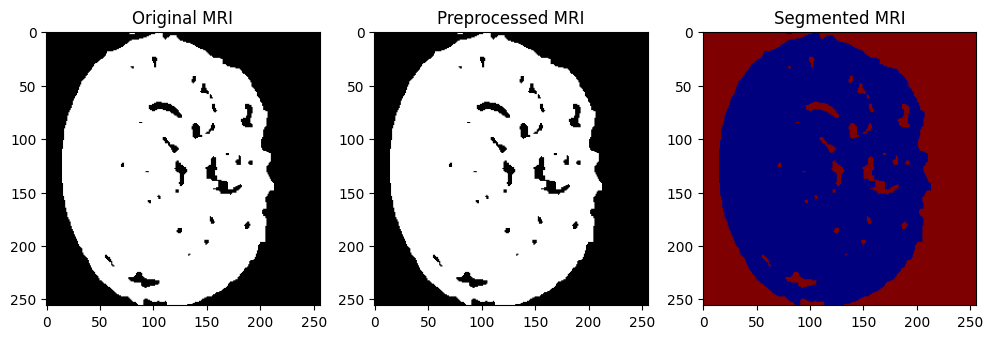

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original MRI")
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.title("Preprocessed MRI")
plt.imshow(preprocess_image(img_path), cmap='gray')

plt.subplot(1,3,3)
plt.title("Segmented MRI")
plt.imshow(seg, cmap='jet')

plt.show()


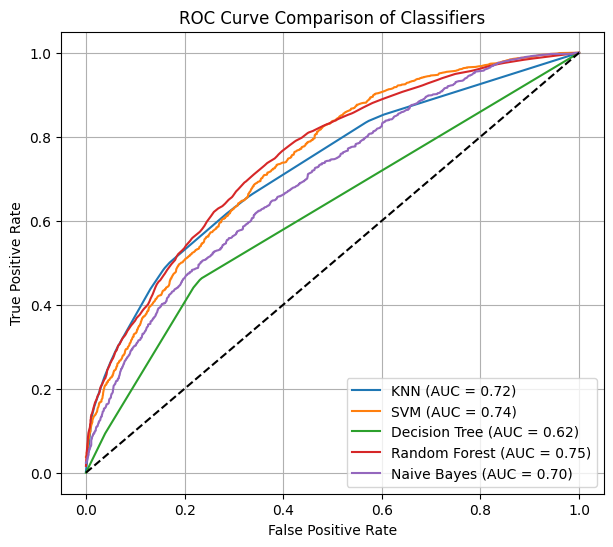

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
n_classes = 4
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
plt.figure(figsize=(7,6))

for name, model in classifiers.items():

    # Train model
    model.fit(X_train, y_train)

    # Get probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        # SVM needs probability=True
        svm_model = SVC(kernel='rbf', probability=True)
        svm_model.fit(X_train, y_train)
        y_score = svm_model.predict_proba(X_test)

    # Compute macro-average ROC
    fpr = dict()
    tpr = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])

    # Aggregate all FPRs
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    roc_auc = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonal line
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Classifiers")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
print("Total images used:", X.shape[0])
print("Training images:", X_train.shape[0])
print("Testing images:", X_test.shape[0])


Total images used: 9488
Training images: 7590
Testing images: 1898


In [ ]:
import numpy as np
from collections import Counter

# Count per class in training data
train_counts = Counter(y_train)

# Count per class in testing data
test_counts = Counter(y_test)

print("Class-wise Training Images:")
for class_name, label in LABELS.items():
    print(f"{class_name}: {train_counts[label]}")

print("\nClass-wise Testing Images:")
for class_name, label in LABELS.items():
    print(f"{class_name}: {test_counts[label]}")


Class-wise Training Images:
Non Demented: 2396
Very mild Dementia: 2405
Mild Dementia: 2403
Moderate Dementia: 386

Class-wise Testing Images:
Non Demented: 604
Very mild Dementia: 595
Mild Dementia: 597
Moderate Dementia: 102


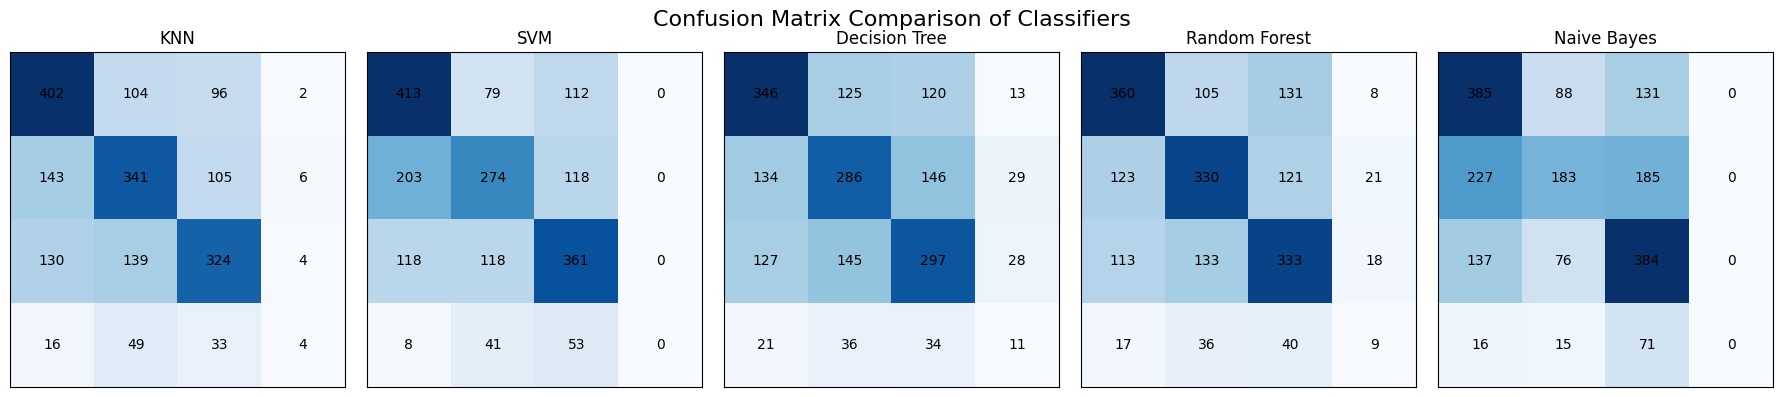

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18, 4))

for idx, (name, model) in enumerate(classifiers.items()):
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Subplot
    plt.subplot(1, len(classifiers), idx + 1)
    plt.imshow(cm, cmap="Blues")
    plt.title(name)

    # Remove axis labels & ticks
    plt.xticks([])
    plt.yticks([])

    # Write values inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     ha="center", va="center", color="black", fontsize=10)

plt.suptitle("Confusion Matrix Comparison of Classifiers", fontsize=16)
plt.tight_layout()
plt.show()
